In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Pre_processdata.csv")

In [3]:
dataset

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [4]:
dataset.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [5]:
class univarient():
    def qualquan():
        qual=[]
        quan=[]
        for columnName in dataset.columns:
            if dataset[columnName].dtype=='O':
                qual.append(columnName)
            else:
                quan.append(columnName)
        return qual,quan

In [6]:
qual,quan=univarient.qualquan()

In [7]:
quan

['Usage_kWh',
 'Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor',
 'NSM']

In [8]:
table=pd.DataFrame(index=['Mean','Median','Mode'],columns=quan)
for columnName in quan:
    table[columnName]["Mean"]=dataset[columnName].mean()
    table[columnName]["Median"]=dataset[columnName].median()
    table[columnName]["Mode"]=dataset[columnName].mode()[0]

In [9]:
table

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Mean,27.3869,13.0354,3.87095,0.0115243,80.5781,84.3679,42750
Median,4.57,5,0,0,87.96,100,42750
Mode,3.06,0,0,0,100,100,0


# Frequency repitation of perticular values

In [22]:
def frequency(columnName,dataset):
    freqn_table=pd.DataFrame(columns=['Unique_values','Frequency','Relation_freq','Cumsum'])
    freqn_table['Unique_values']=dataset[columnName].value_counts().index
    freqn_table['Frequency']=dataset[columnName].value_counts().values
    freqn_table['Relation_freq']=freqn_table['Frequency']/103
    freqn_table['Cumsum']=freqn_table['Relation_freq'].cumsum()
    return freqn_table

In [25]:
frequency('Day_of_week',dataset)

,Unique_values,Frequency,Relation_freq,Cumsum
0,Monday,5088,49.398058,49.398058
1,Friday,4992,48.466019,97.864078
2,Wednesday,4992,48.466019,146.330097
3,Thursday,4992,48.466019,194.796117
4,Sunday,4992,48.466019,243.262136
5,Tuesday,4992,48.466019,291.728155
6,Saturday,4992,48.466019,340.194175


# Histogram, Skewness, Kurtosis

In [26]:
table=pd.DataFrame(index=['Mean','Median','Mode','Skew','Kurtosis'],columns=quan)
for columnName in quan:
    table[columnName]['Mean']=dataset[columnName].mean()
    table[columnName]['Median']=dataset[columnName].median()
    table[columnName]['Mode']=dataset[columnName].mode()[0]
    table[columnName]['Skew']=dataset[columnName].skew()
    table[columnName]['Kurtosis']=dataset[columnName].kurtosis()
    
    

In [27]:
table

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Mean,27.3869,13.0354,3.87095,0.0115243,80.5781,84.3679,42750
Median,4.57,5,0,0,87.96,100,42750
Mode,3.06,0,0,0,100,100,0
Skew,1.19739,1.4379,1.73431,1.14935,-0.606126,-1.51198,0
Kurtosis,0.391386,1.21384,1.5811,0.214605,-1.09582,0.383301,-1.20026


In [30]:
table=pd.DataFrame(index=['Mean','Median','Mode','Skew','Kurtosis','VAR','STD'],columns=quan)
for columnName in quan:
    table[columnName]['Mean']=dataset[columnName].mean()
    table[columnName]['Median']=dataset[columnName].median()
    table[columnName]['Mode']=dataset[columnName].mode()[0]
    table[columnName]['Skew']=dataset[columnName].skew()
    table[columnName]['Kurtosis']=dataset[columnName].kurtosis()
    table[columnName]['VAR']=dataset[columnName].var()
    table[columnName]['STD']=dataset[columnName].std()

In [31]:
table

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Mean,27.3869,13.0354,3.87095,0.0115243,80.5781,84.3679,42750
Median,4.57,5,0,0,87.96,100,42750
Mode,3.06,0,0,0,100,100,0
Skew,1.19739,1.4379,1.73431,1.14935,-0.606126,-1.51198,0
Kurtosis,0.391386,1.21384,1.5811,0.214605,-1.09582,0.383301,-1.20026
VAR,1118.53,265.886,55.1226,0.000260849,358.016,927.601,6.2203e+08
STD,33.4444,16.306,7.42446,0.0161508,18.9213,30.4565,24940.5


# Probability density Function

In [37]:
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import norm

C:\Users\Priya\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


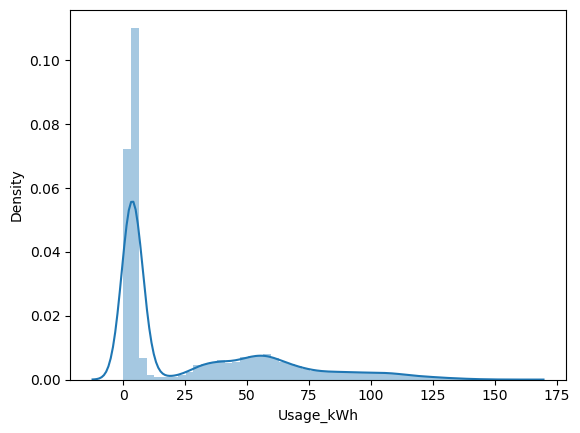

In [38]:
sns.distplot(dataset['Usage_kWh'])

In [41]:
def pdf_prob(dataset,startrange,endrange):
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='green')
    pyplot.axvline(startrange,color='red')
    pyplot.axvline(endrange,color='red')
    sample=dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('mean={},Standard Deviation={}'.format(sample_mean, sample_std))
    dist=norm(sample_mean,sample_std)
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print('The area between range ({},{}):{}'.format(startrange,endrange,prob))
    return prob

C:\Users\Priya\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


mean=27.386892408675795,Standard Deviation=33.44437970801513
The area between range (30,50):0.22057239145193555


0.22057239145193555

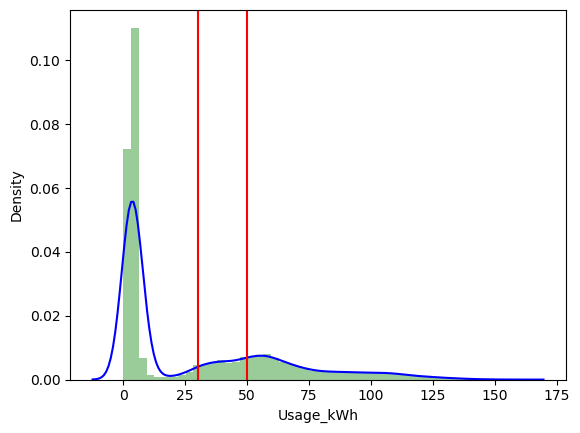

In [43]:
pdf_prob(dataset['Usage_kWh'],30,50)

In [44]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['Usage_kWh'])
ecdf(80)

0.9053367579908675

In [48]:
def std_normaldist(dataset):
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std) for j in values]
    sns.distplot(z_score,kde=True)

C:\Users\Priya\Anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys


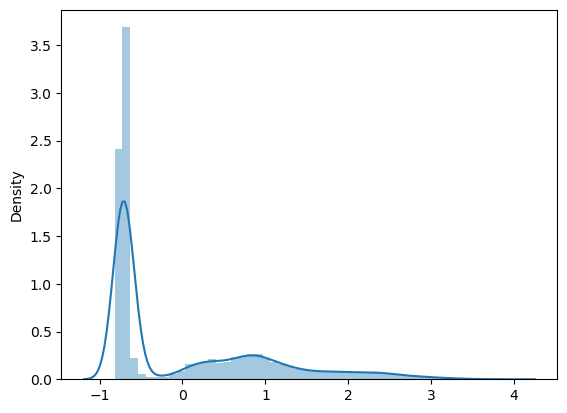

In [49]:
std_normaldist(dataset['Usage_kWh'])